### Build a DNN using Keras with `RELU` and `ADAM`

#### 1. Load tensorflow (1 Mark)

In [1]:
import tensorflow as tf
import numpy as np

#### 2. Collect Fashion mnist data from tf.keras.datasets (1 Mark)

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


#### Please run this cell as class names are not included, need to create them to plot the images

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 3(a). Display Shapes of Train and Test sets (0.5 Mark)

In [4]:
train_x.shape

(60000, 28, 28)

In [5]:
test_x.shape

(10000, 28, 28)

#### 3(b). Check how many classes (unique categories) we have in target column (0.5 Mark)

#### Hint: np.unique

In [6]:
np.unique(test_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#### 4. Plot/Visualize the first image from the training dataset using matplotlib's imshow and display the class name below the image (2 Marks)

In [0]:
import matplotlib.pyplot as plt

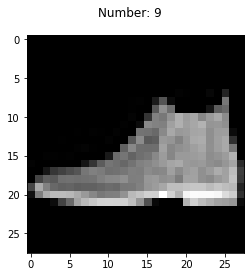

In [9]:
#img_num = np.random.randint(0, test_x.shape[0]) #Get a random integer between 0 and number of examples in test dataset
plt.imshow(test_x[0],cmap='gray') #Show the image from test dataset
plt.suptitle('Number: ' + str(test_y[0]))
plt.show()

#### 5. Change train and test labels into one-hot vectors (1 Mark)

In [10]:
test_y[0]

9

In [0]:
trainY = tf.keras.utils.to_categorical(train_y, num_classes=10)
testY = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [13]:
testY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### Build the Graph

#### 6.Initialize model, reshape & batch normalize data (1 Mark)

In [0]:
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#### 7(a). Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. (1 Mark)

In [0]:
model.add(tf.keras.layers.Dense(200,activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100,activation="relu"))
model.add(tf.keras.layers.BatchNormalization())

#### 7(b). Add a dropout layer with `p=0.25` (1 Mark)

In [0]:
model.add(tf.keras.layers.Dropout(0.25))

#### 8. Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. (1 Mark)

In [0]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

### Compile Model
#### 9. Use `categorical_crossentropy` loss, `adam` optimizer, `accuracy` metric and compile the model. (1 Mark)

In [0]:
adam=tf.keras.optimizers.Adam(lr=0.01,decay=0.001)

In [0]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

### Model Training
#### 10. Fit your model on train set, using validation_split=0.2, epochs=10 and batch_size=32 and assign it to a variable "hist_model" which can be used to plot loss and accuracy curves using saved history. (5 Marks)

In [79]:
history=model.fit(train_x,trainY,
          validation_split=(0.2),
          epochs=10,
          batch_size=32)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 195us/sample - loss: 0.5570 - acc: 0.8024 - val_loss: 0.3700 - val_acc: 0.8637
Epoch 2/10
48000/48000 [==============================] - 9s 186us/sample - loss: 0.4205 - acc: 0.8463 - val_loss: 0.3723 - val_acc: 0.8672
Epoch 3/10
48000/48000 [==============================] - 9s 181us/sample - loss: 0.3800 - acc: 0.8624 - val_loss: 0.3393 - val_acc: 0.8778
Epoch 4/10
48000/48000 [==============================] - 8s 176us/sample - loss: 0.3510 - acc: 0.8706 - val_loss: 0.3258 - val_acc: 0.8841
Epoch 5/10
48000/48000 [==============================] - 9s 181us/sample - loss: 0.3309 - acc: 0.8792 - val_loss: 0.3271 - val_acc: 0.8803
Epoch 6/10
48000/48000 [==============================] - 9s 182us/sample - loss: 0.3121 - acc: 0.8842 - val_loss: 0.3256 - val_acc: 0.8855
Epoch 7/10
48000/48000 [==============================] - 9s 192us/sample - loss: 0.2953 - acc: 0.8917 - val_l

In [0]:
model.save('mnist_intern.h5')

### Model Evaluation

In [0]:
import matplotlib.pyplot as plt

#### 11. Visualize/Plot loss curves for training data, val data and provide your inference (2 Marks)

In [33]:
import keras as keras

Using TensorFlow backend.


In [49]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


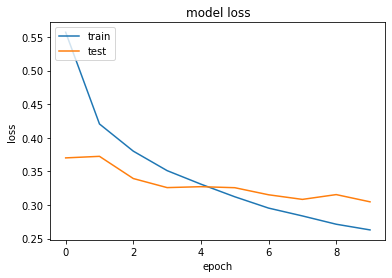

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As we trying to tune the hyperparameters like learning rate,batch size ,activation function the loss of training and validation data has decreasing....

#### 12. Visualize/Plot accuracy curves for training data, val data and provide your inference (2 Marks)

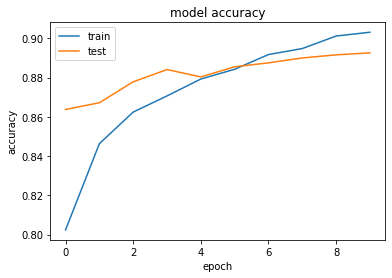

In [82]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

As the loss decreases by the process of hyperparameter tuning, the accuracy of training and testing is increases.

In [0]:
#### 13. Evaluate the above model on test set and report test loss & accuracy (1 Mark)
#### Hint: model.evaluate()

In [86]:
model.evaluate(test_x,testY)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.3384 - acc: 0.8827


[0.33842802803516386, 0.8827]

#### 14. Predict the labels for test set and store in a variable named "predictions" (1 Mark)

#### Hint: model.predict()

In [0]:
predictions=model.predict(test_x)

#### 15. Write a for loop to visualize, display actual label, predicted label along with class names for 0th, 100th and 200th images in test set.  
#### (3 Marks)

9 : Ankle boot


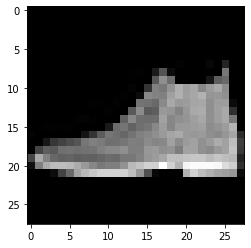

3 : Dress


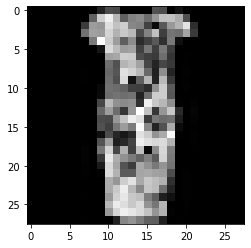

1 : Trouser


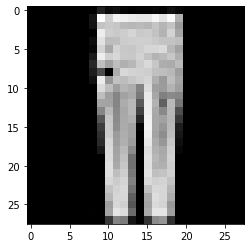

In [96]:
  for i in [0,100,200]:
    #print(i)
     plt.imshow(test_x[i],cmap='gray')
     print(np.argmax(predictions[i]),":",class_names[np.argmax(predictions[i])])
     plt.show()